In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import yfinance as yf

In [3]:
#252 trading days annually
NUM_TRADING_DAYS=252
NUM_SIMULATIONS=10000
stocks=["RELIANCE.NS","TCS.NS","HINDUNILVR.NS","HDFCBANK.NS","ITC.NS","LT.NS","INFY.NS"]
start_date="2018-10-01"
end_date="2023-10-01"
#YYYY-MM-DD

In [5]:
stock_data={}
for stock in stocks:
    ticker=yf.Ticker(stock)
    stock_data[stock]=ticker.history(start=start_date,end=end_date)['Close'] #extracting the closing prices

stock_prices=pd.DataFrame(stock_data)
#logarithmic returns and simple returns are almost similar on daily basis..but since log consises the range and makes calculation easier

In [6]:
stock_prices

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,1197.153442,2024.673828,1513.858643,982.032654,246.232300,1140.846191,645.737122
2018-10-03 00:00:00+05:30,1171.299438,1941.463135,1492.242432,979.958069,244.657578,1138.423828,630.040222
2018-10-04 00:00:00+05:30,1090.773071,1853.449097,1450.854004,944.545105,237.944427,1149.804077,611.619080
2018-10-05 00:00:00+05:30,1019.431763,1887.424438,1436.658447,948.187744,229.159286,1121.925171,626.667358
2018-10-08 00:00:00+05:30,1078.283569,1864.894165,1437.395996,938.393799,226.424301,1110.910400,617.889038
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,2340.449951,3577.149902,2475.850098,1531.000000,442.600006,2902.500000,1474.150024
2023-09-26 00:00:00+05:30,2342.500000,3585.699951,2478.949951,1537.650024,442.450012,2912.550049,1460.650024
2023-09-27 00:00:00+05:30,2368.899902,3589.300049,2501.750000,1526.849976,449.149994,2965.050049,1467.000000


In [10]:
log_returns=np.log(stock_prices/stock_prices.shift(1)) #price of day x/price of day (x-1)
log_returns #1st days is NaN due the above formula
log_returns=log_returns[1:] #removed NaN valued row
log_returns

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-03 00:00:00+05:30,-0.021833,-0.041967,-0.014382,-0.002115,-0.006416,-0.002126,-0.024609
2018-10-04 00:00:00+05:30,-0.071227,-0.046394,-0.028128,-0.036806,-0.027822,0.009947,-0.029674
2018-10-05 00:00:00+05:30,-0.067641,0.018165,-0.009832,0.003849,-0.037620,-0.024545,0.024306
2018-10-08 00:00:00+05:30,0.056125,-0.012009,0.000513,-0.010383,-0.012007,-0.009866,-0.014107
2018-10-09 00:00:00+05:30,-0.017596,0.006836,-0.030538,-0.002265,-0.017353,0.004679,0.004608
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,-0.006176,-0.007381,-0.002662,0.000882,-0.001129,-0.005497,-0.014814
2023-09-26 00:00:00+05:30,0.000876,0.002387,0.001251,0.004334,-0.000339,0.003457,-0.009200
2023-09-27 00:00:00+05:30,0.011207,0.001004,0.009155,-0.007049,0.015029,0.017865,0.004338


In [21]:
#average daily returns * number of trading days == average annual returns
print(log_returns.mean()*NUM_TRADING_DAYS)

RELIANCE.NS      0.137190
TCS.NS           0.113347
HINDUNILVR.NS    0.099529
HDFCBANK.NS      0.089981
ITC.NS           0.120480
LT.NS            0.198878
INFY.NS          0.163002
dtype: float64


In [22]:
#annualised volatality of stocks
#standard deviation is the risk metric
print(log_returns.std()*np.sqrt(NUM_TRADING_DAYS))

RELIANCE.NS      0.313954
TCS.NS           0.253070
HINDUNILVR.NS    0.238601
HDFCBANK.NS      0.270058
ITC.NS           0.265032
LT.NS            0.283981
INFY.NS          0.292504
dtype: float64


In [23]:
portfolio_weights=[]
portfolio_returns=[] #returns corresponding to weights
portfolio_risks=[] #risks corresponding to weights

In [24]:
for _ in range(NUM_SIMULATIONS):
    w=np.random.random(len(stocks)) #number of weights equal to number of stocks
    w/=np.sum(w) #to make the sum of the weights as 1..
    portfolio_weights.append(w)
    port_return= np.sum(log_returns.mean()*w)*NUM_TRADING_DAYS # the average daily return of the portfolio (as log_returns give us the daily returns) * number of trading days to get annualised returns
    portfolio_returns.append(port_return) #appending in list for each simulation
    port_risk=np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*(NUM_TRADING_DAYS) ,w))) #portfolio's variance in matrix form --> 
    #sigma1^2 sigma12 sigma13 ... sigma 17
    #sigma2^2 sigma23 sigma.. and so on
    #sigma=w1^2*sigma1^2+w2^2*sigma2^2+2*w1*w1*cov(K1,K2)
    portfolio_risks.append(port_risk)

In [25]:
portfolio_weights=np.array(portfolio_weights)
portfolio_returns=np.array(portfolio_returns)
portfolio_risks=np.array(portfolio_risks)

In [26]:
portfolios=pd.DataFrame({"Return":portfolio_returns,"Risk": portfolio_risks,"Sharpe Ratio": portfolio_returns/portfolio_risks})

In [27]:
portfolios

,Return,Risk,Sharpe Ratio
0,0.119410,0.182457,0.654458
1,0.138836,0.185090,0.750099
2,0.127171,0.191575,0.663818
3,0.123175,0.178369,0.690562
4,0.140834,0.197674,0.712457
...,...,...,...
9995,0.111247,0.182755,0.608720
9996,0.127561,0.179575,0.710348
9997,0.138689,0.189677,0.731188
9998,0.132152,0.178138,0.741851


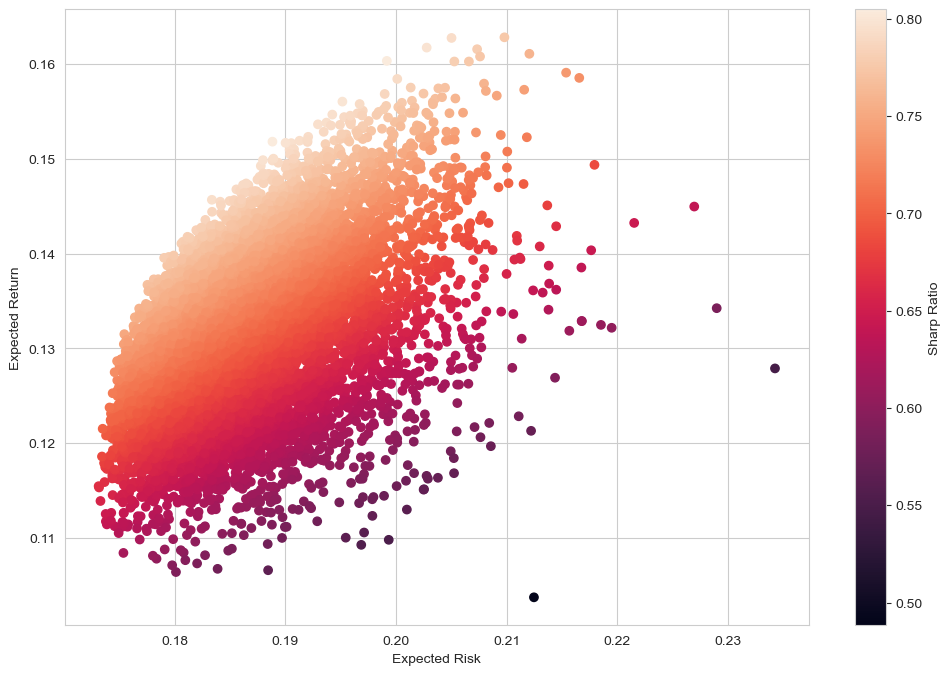

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns, c=portfolio_returns / portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label="Sharp Ratio")
plt.show()
#markowitz hyperbola
#efficient frontier

In [30]:
sharpe_ratios=portfolio_returns/portfolio_risks
ind=0
for i in range(len(sharpe_ratios)):
    if sharpe_ratios[i]==np.amax(sharpe_ratios):
        ind=i
#finding highest sharpe ratios

In [31]:
sharpe_ratios[ind]

0.8048856954757022

In [32]:
portfolio_returns[ind] #almost 16% returns

0.16031975535920398

In [33]:
portfolio_risks[ind] #nearly 19% risk

0.19918325826930253

In [34]:
for i in range(len(stocks)):
    print(stocks[i],':',portfolio_weights[ind][i])
#this represents how much of our capital should we divide amongst a group of stocks

RELIANCE.NS : 0.04475457938230038
TCS.NS : 0.049573515265046525
HINDUNILVR.NS : 0.12182699743020303
HDFCBANK.NS : 0.016134255758493234
ITC.NS : 0.08181972867406903
LT.NS : 0.3713960387588172
INFY.NS : 0.3144948847310706


In [36]:
ind=0
for i in range(len(sharpe_ratios)):
    if sharpe_ratios[i]==np.amin(sharpe_ratios):
        ind=i

In [37]:
portfolio_returns[ind]

0.10375509735542944

In [38]:
portfolio_risks[ind]

0.21247341924738497

In [39]:
for i in range(len(stocks)):
    print(stocks[i],':',portfolio_weights[ind][i])

RELIANCE.NS : 0.12411836332579364
TCS.NS : 0.04319401932426148
HINDUNILVR.NS : 0.14413436369012
HDFCBANK.NS : 0.6047198845368458
ITC.NS : 0.03350306676581
LT.NS : 0.023196148777158813
INFY.NS : 0.027134153580010235


In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns, c=portfolio_returns / portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label="Sharp Ratio")

plt.show()